# Redes Convolucionadas

## Ejemplo mnist - handwrite numbers

## Autor

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 


# Referencias

# El modelo


# Importa módulos

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.1.0


# Apunta los datos de tf.keras

In [18]:
mnist = tf.keras.datasets.fashion_mnist

## Lee los datos


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


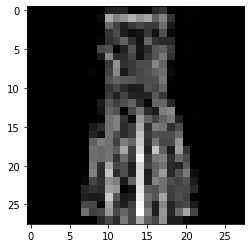


The Label is 3 (Dress)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00784314 0.1254902  0.14117647
  0.14509804 0.         0.         0.02745098 0.16470588 0.21568627]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.04705882 0.66666667 0.49803922
  0.57647059 0.68627451 0.58039216 0.63921569 0.37647059 0.51764706]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.00784314 0.41568627 0.2627451
  0.13333333 0.21960784 0.2745098  0.23921569 0.23137255 0.42745098]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.2        0.30196078
  0.11372549 0.04705882 0.07843137 0.21568627 0.0745098  0.30980392]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.01176471 0.18823529 0.24313725
  0.38823529 0.19607843 0.0627451  0.39215686 0.2        0.1

In [19]:
import matplotlib.pyplot as plt
import random

# Choose a random index number in the training set

choice  = random.choice(range(len(training_images)))

# Show Random Image Using imshow

plt.imshow(training_images[choice], cmap='gray')
plt.show()

# Print label of the choosen image and its array representation

print('\n' + "The Label is " + str(training_labels[choice]) + ' ('+ class_names[training_labels[choice]] +')'+'\n')
print(training_images[choice][:,0:18])

Esta es el arreglo de valores originales de la imagen. 

Normalizamos

In [20]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# El modelo

## Importa módulos

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.1.0


In [22]:
training_images.shape

(60000, 28, 28)

## Define el modelo

1. Capa 1: Conv2D con 32 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28*28*1. Los filtros son pasados por una f. de activaci+on 'relu'.
2. Capa 2. MaxPooling. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación nunca.

<figure>
<center>
<img src="./Imagenes/maxpool.webp" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Max pooling 2*2</p>
</figcaption>
</figure>

3. Capa 3. Flatten. Toma todos los filtros resultantes  de la capa MaxPooling y los organiza como un único tensor unidimensional
4. Capa 4. Dense. Recibe el tensor saliente de la capa Flatten y genera una salida en 128 unidades, usando activación *relu*
5. Capa 5. Densa Recibe el tensor unidmensional de shape=128 t lo transforma en la salida de 10 unidades. Hay 10 clases. El predictor es al final transformado por la acticación *softmax* para obtener una distribución de la posible clase para la imagend e entrada

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Entrenamiento

## Crea una clase derivada de tf.keras.callbacks.Callback 

Se usa para pasar funciones de control al algoritmo de estimación. Aquí la usaremos para el entrenamiento pare cuando se alcance un determinado accuracy con los datos de entrenamiento

*tf.keras.callbacks.Callback* es una clase abstracta para permitir escribir métodos que actuan en el proceso de entranamiento o de test. Para detalles vea [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.01):
            print("\nReached 0.01 loss so cancelling training!")
            self.model.stop_training = True

# crea una instancia de clase
loss_callback = myCallback()


## Crea un checkpoint para guardar los pesos

In [10]:
# Directory where the checkpoints will be saved
import os 
checkpoint_dir = './training_checkpoints_mnist_fashion'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "mnist_fashion_ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True, 
    monitor='val_accuracy', mode='max',
    save_best_only=True)

## Compila el modelo

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Observe como se pasan los callbacks

## Entrena el modelo

In [23]:
# reshape training data
training_images = training_images.reshape(60000, 28, 28, 1)

#history = model.fit(training_images, training_labels, epochs=100, validation_split=0.2, batch_size=32,callbacks=[accu_callback, checkpoint_callback])
history = model.fit(training_images, training_labels, epochs=20, validation_split=0.2, batch_size=64,callbacks=[loss_callback,checkpoint_callback ])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 30s 620us/sample - loss: 1.1124 - accuracy: 0.6264 - val_loss: 0.6835 - val_accuracy: 0.7481
Epoch 2/20
48000/48000 [==============================] - 29s 598us/sample - loss: 0.6397 - accuracy: 0.7624 - val_loss: 0.5825 - val_accuracy: 0.7825
Epoch 3/20
48000/48000 [==============================] - 29s 606us/sample - loss: 0.5608 - accuracy: 0.7962 - val_loss: 0.5275 - val_accuracy: 0.8092
Epoch 4/20
48000/48000 [==============================] - 29s 606us/sample - loss: 0.5078 - accuracy: 0.8182 - val_loss: 0.4923 - val_accuracy: 0.8253
Epoch 5/20
48000/48000 [==============================] - 34s 709us/sample - loss: 0.4746 - accuracy: 0.8314 - val_loss: 0.4674 - val_accuracy: 0.8323
Epoch 6/20
48000/48000 [==============================] - 28s 580us/sample - loss: 0.4481 - accuracy: 0.8408 - val_loss: 0.4582 - val_accuracy: 0.8312
Epoch 7/20
48000/48000 [====================

# Evalua el modelo

# Gráficas de funciones de pérdida y accuracy

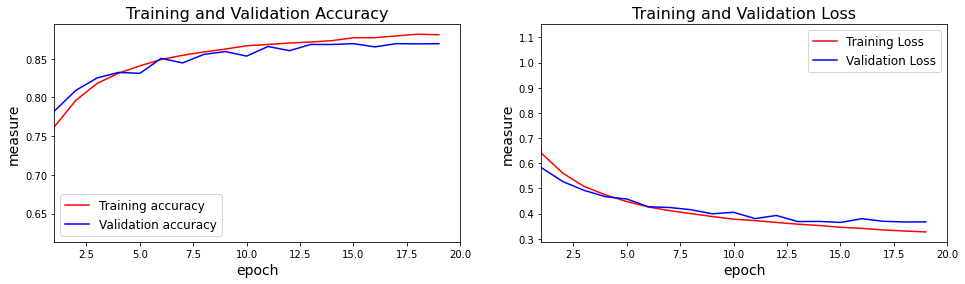

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

## Carga los pesos del mejor modelo obtenido

In [ ]:
#model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

#model.build(tf.TensorShape([1, None]))

## Evalua el modelo con los dato de prueba (test)

In [25]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 289us/sample - loss: 0.3858 - accuracy: 0.8602


[0.38580286173820494, 0.8602]

## Muestra de algunas predicciones

Calcula las clases predichas las probabilidades calculadas por softmax

In [26]:
preds = model.predict_classes(test_images)
prob = model.predict_proba(test_images)
len(preds)

10000

In [27]:

for i in range(100):
    print (i, preds[i], test_labels[i])


0 9 9
1 2 2
2 1 1
3 1 1
4 6 6
5 1 1
6 4 4
7 6 6
8 5 5
9 7 7
10 4 4
11 5 5
12 7 7
13 3 3
14 4 4
15 1 1
16 2 2
17 2 4
18 8 8
19 0 0
20 2 2
21 7 5
22 7 7
23 5 9
24 1 1
25 2 4
26 6 6
27 0 0
28 9 9
29 3 3
30 8 8
31 8 8
32 1 3
33 3 3
34 8 8
35 0 0
36 7 7
37 5 5
38 7 7
39 9 9
40 0 6
41 1 1
42 6 3
43 7 7
44 6 6
45 7 7
46 2 2
47 1 1
48 2 2
49 6 2
50 2 4
51 2 4
52 5 5
53 8 8
54 2 2
55 2 2
56 8 8
57 6 4
58 8 8
59 0 0
60 7 7
61 7 7
62 8 8
63 5 5
64 1 1
65 1 1
66 3 2
67 4 3
68 7 9
69 8 8
70 7 7
71 0 0
72 2 2
73 6 6
74 2 2
75 3 3
76 1 1
77 2 2
78 8 8
79 4 4
80 1 1
81 8 8
82 5 5
83 9 9
84 5 5
85 0 0
86 3 3
87 2 2
88 0 0
89 2 6
90 5 5
91 3 3
92 6 6
93 7 7
94 1 1
95 8 8
96 0 0
97 1 1
98 2 4
99 2 2


## imagen 42
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label = 0


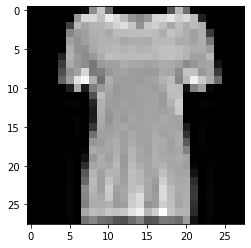

In [28]:
print('label =' ,training_labels[10])
plt.imshow(training_images[10,:,:,0],cmap='gray')
plt.show()

## detección de malas predicciones

In [29]:
bad_pred=[]
for i in range (len(preds)):
    if preds[i]!=test_labels[i]:
        bad_pred.append(i)

In [30]:
bad_pred

[17,
 21,
 23,
 25,
 32,
 40,
 42,
 49,
 50,
 51,
 57,
 66,
 67,
 68,
 89,
 98,
 107,
 127,
 141,
 147,
 150,
 151,
 153,
 155,
 222,
 239,
 244,
 249,
 250,
 266,
 282,
 283,
 285,
 312,
 314,
 316,
 324,
 325,
 332,
 344,
 359,
 367,
 378,
 381,
 382,
 389,
 392,
 396,
 404,
 406,
 419,
 437,
 441,
 444,
 454,
 457,
 460,
 474,
 476,
 480,
 490,
 526,
 529,
 541,
 548,
 562,
 563,
 565,
 569,
 572,
 577,
 586,
 587,
 595,
 607,
 623,
 628,
 633,
 634,
 635,
 639,
 661,
 663,
 664,
 670,
 681,
 685,
 686,
 688,
 689,
 697,
 699,
 701,
 706,
 711,
 722,
 725,
 726,
 732,
 737,
 753,
 760,
 761,
 767,
 785,
 787,
 793,
 800,
 801,
 805,
 828,
 837,
 844,
 851,
 852,
 877,
 887,
 890,
 894,
 902,
 909,
 921,
 926,
 930,
 937,
 938,
 946,
 956,
 963,
 965,
 966,
 968,
 971,
 976,
 977,
 979,
 993,
 994,
 995,
 1004,
 1005,
 1008,
 1025,
 1029,
 1051,
 1055,
 1056,
 1058,
 1064,
 1096,
 1101,
 1104,
 1107,
 1111,
 1121,
 1124,
 1131,
 1139,
 1142,
 1152,
 1160,
 1162,
 1165,
 1174,
 1175,


label = 6 prediction=  0


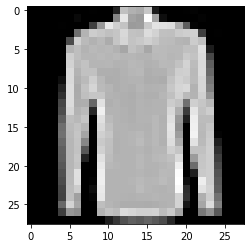

In [32]:
print('label =' ,training_labels[bad_pred[5]], 'prediction= ',preds[bad_pred[5]])
plt.imshow(training_images[bad_pred[5],:,:,0],cmap='gray')
plt.show()